# Task1: Handling images data using PyTorch (Tensors, Datasets, and Dataloaders)

## Prior task:
1- Tensors tutorial: https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html \\
2- Tensors vedio: https://www.youtube.com/watch?v=exaWOE8jvy8 \\
3- Datasets, and Dataloaders tutorial: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html \\
4- Datasets, and Dataloaders vedio:  https://www.bing.com/videos/riverview/relatedvideo?q=datasets+and+dataloaders+pytorch+tutorial&mid=30EF363CAF98DE305AE530EF363CAF98DE305AE5&FORM=VIRE \\



## Task Description:
Read the dataset provided as a CSV file, create a dataset class in PyTorch, and then implement a DataLoader to load batches of the data. Finally, visualize some of the images from the dataset.
Data: https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd
from torchvision.io import read_image
import numpy as np

In [38]:
file_path = "/content/age_gender.csv"
df = pd.read_csv(file_path)
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [39]:
class CustomImageDataset(Dataset):
    def __init__(self, data_path, transform=None, target_transform=None):
        self.data = pd.read_csv(data_path)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        pixels = self.data['pixels'].iloc[idx]
        image = torch.tensor(np.array(pixels.split(" ")).astype('float32').reshape(48,48)).unsqueeze(0)

        label = self.data['age'].iloc[idx]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

In [40]:
dataset = CustomImageDataset(file_path)

In [41]:
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [42]:
b_size = 32
train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True)
val_loader =   DataLoader(val_dataset, batch_size=b_size)
test_loader =  DataLoader(test_dataset, batch_size=b_size)

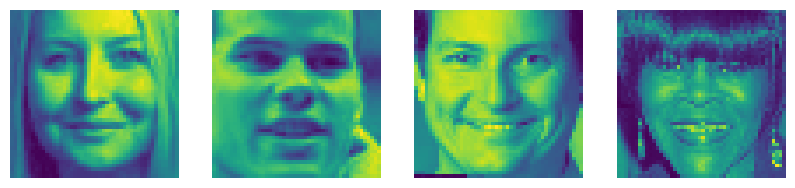

In [53]:
batch = next(iter(train_loader))
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

for i in range(4):
    image, label = batch[0][i], batch[1][i]
    image = image.squeeze(0)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()